<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/regresion-logistica/Regresi%C3%B3n_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

La regresión logística es un métdo de clasificación binaria, es decir, la variable dependiente sólo puede tomar dos valores: Verdadero ó Falso, 1 ó 0, etc.

Se denomina regresión logística ya que el corazón del método es la llamada función logística o función sigmoide, la cual es de la forma:

\begin{equation}
  \sigma(z)=\frac{1}{1+e^{-z}}
\end{equation}

Se usa el método de regresión logística para modelar variables dependientes binarias en lugar de la regresión lineal, ya que esta última, para valores que se encuentran en los extremos de la recta predicha entrega valores menores a cero y mayores a uno. Esto va en contra de la definición teórica de probabilidad, según la cual estas están en el rango $[0, 1]$.

Entonces el método de regresión logística utiliza la recta generada por la regresión lineal pero la pasa por la función sigmoide para que el resultado siempre esté entre 0 y 1. En otras palabras, el problema de regresión se convierte en un problema de clasificación.

Dado un conjunto de datos, suponemos que podemos modelarlo con una expresión matemática de la forma:

\begin{equation}
y=wx+b
\end{equation}

Esta ecuación es una representación lineal de la relación que existe entre los datos de entrada $x$ (características) y la salida $y$. Donde $y$ se puede expresar de la forma:


\begin{equation}
\hat{y}^{(i)}=w_0+w_1x_1^{(i)}+w_2x_2^{(i)}+...+w_nx_n^{(i)}
\end{equation}

Para clasificación se necesita acotar este resultado a valores de $y$ entre $[0, 1]$ por lo que necesitamos pasar este resultado a través de la función de activación sigmoide:

 \begin{equation}
  \sigma(\hat y)=P(\hat{y}^{(i)}=1)=\frac{1}{1+e^{w_0+w_1x_1^{(i)}+w_2x_2^{(i)}+...+w_nx_n^{(i)}}}
\end{equation}

Gráficamente la función sigmoide tiene la siguiente forma:

In [1]:
#import requests

#url = 'https://github.com/juanchess98/Notebooks-Deep-Learning.git'

#request = requests.get(url)

In [18]:
#import sys
#sys.path.insert(0,'/content/helpers.py')

In [1]:
import helpers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

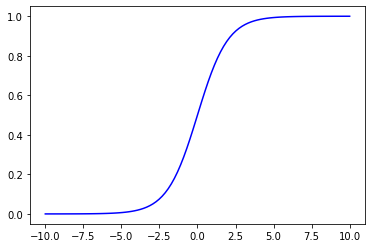

In [3]:
sigmoide = lambda x: 1/(1+np.exp(-x))
senal = helpers.crear_db(sigmoide, ruido=0, rango=(-10, 10))
helpers.plot_data(senal[0], senal[1], label='Sigmoide')

In [4]:
#Representación grafica

# Optimización

In [32]:
from sklearn import datasets
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf

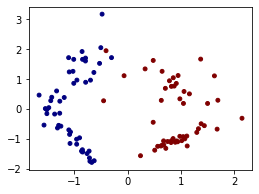

In [33]:
X_, y_ = datasets.make_classification(n_samples=100, n_features = 2, random_state=1, n_redundant=0)

fig = plt.figure(figsize=(4.0, 3.0))
ax = fig.add_subplot(111)
ax.scatter(X_[:,0],X_[:,1],s=15,c=y_.squeeze(),cmap='jet')

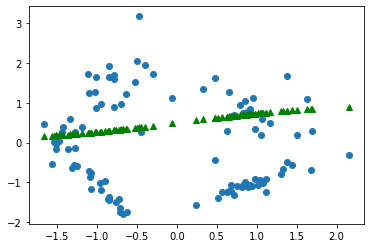

In [34]:
plt.plot(X_[:,0],X_[:,1], 'o', X_[:,0], sigmoide(X_[:,0]), 'g^')#, t, t**3, 'g^')
plt.show()

# Implementacion de Regresión Logística en Keras de Tensorflow 2

## 1. Implementación de Regresión Logística usando el modo funcional de keras

La API funcional de Keras es el modo más flexible de crear modelos en esta API ya que permite implementar topologías no-lineales, compartir capas y modelos de múltiples entradas-múltiples salidas.

La idea detrás de esto es que un modelo de aprendizaje profundo es un grafo acíclico dirigido (DAG, por sus siglas en inglés) de capas. Por lo tanto la API funcional es un modo de construir grafos de capas.

Para nuestro ejemplo de regresión logística:

In [85]:
def reg_logistica(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):

    ## Implementación con Keras funcional
    dim = X_train.shape[0]
    inputs = tf.keras.layers.Input(shape=(dim,1))
    preds = tf.keras.layers.Dense(1,activation='sigmoid')(inputs)
    
    model = tf.keras.models.Model(inputs=inputs,outputs=preds)
    
    sgd = keras.optimizers.SGD(lr=learning_rate)
    model.compile(optimizer=sgd ,loss='binary_crossentropy',metrics=['binary_accuracy'])
    model.fit(X_train, Y_train, batch_size=1, epochs=num_iterations, shuffle=False)
    return model

In [86]:
model_logistic = reg_logistica(X_[:80,0], y_[:80], X_[81:,0], y_[81:], num_iterations=20)

Epoch 1/20
80/80 [==============================] - 0s 958us/step - loss: 0.1604 - binary_accuracy: 0.9625
Epoch 2/20
80/80 [==============================] - 0s 870us/step - loss: 0.0875 - binary_accuracy: 0.9750
Epoch 3/20
80/80 [==============================] - 0s 875us/step - loss: 0.0759 - binary_accuracy: 0.9750
Epoch 4/20
80/80 [==============================] - 0s 891us/step - loss: 0.0700 - binary_accuracy: 0.9750
Epoch 5/20
80/80 [==============================] - 0s 896us/step - loss: 0.0662 - binary_accuracy: 0.9750
Epoch 6/20
80/80 [==============================] - 0s 877us/step - loss: 0.0634 - binary_accuracy: 0.9750
Epoch 7/20
80/80 [==============================] - 0s 886us/step - loss: 0.0612 - binary_accuracy: 0.9750
Epoch 8/20
80/80 [==============================] - 0s 936us/step - loss: 0.0594 - binary_accuracy: 0.9750
Epoch 9/20
80/80 [==============================] - 0s 961us/step - loss: 0.0580 - binary_accuracy: 0.9750
Epoch 10/20
80/80 [==================

In [87]:
model_logistic.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 80, 1)]           0         
_________________________________________________________________
dense_14 (Dense)             (None, 80, 1)             2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [93]:
len(model_logistic.layers[1].weights)
model_logistic.layers[0].weights[0].shape
model_logistic.layers[1].weights[1].shape

IndexError: list index out of range

# Graficar la salida de cada epoca?

## 2. Implementación de Regresión Logística usando el modelo secuencial de Keras

In [79]:
def reg_logistica_2 (X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.1):
    dim = X_train.shape[0]
    print(X_train.shape)
    model = keras.Sequential()
    model.add(keras.Input(dim, ))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    sgd = keras.optimizers.SGD(lr=learning_rate) #SGD=Stochastic Gradient Descent
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])
    model.fit(X_train, Y_train, batch_size=1, epochs=num_iterations, shuffle=False)
    return model

In [80]:
seq_model = reg_logistica_2(X_[:80,0], y_[:80], X_[81:,0], y_[81:], num_iterations=20)

(80,)
Epoch 1/20


ValueError: in user code:

    /home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/david/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/david/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/david/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /home/david/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: expected axis -1 of input shape to have value 80 but received input with shape [1, 1]


# Implementacion en Pytorch

In [12]:
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [13]:
X_, y_ = datasets.make_classification(n_samples=100, n_features = 6, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


n_samples, n_features = X_.shape

In [14]:
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

In [15]:
model = LogisticRegression(n_features)

In [16]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(params= model.parameters(),lr = learning_rate)

In [17]:
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)

    #backward
    loss.backward()

    ##update
    optimizer.step()

    optimizer.zero_grad() ## clean gradients to next iteration

    if(epoch+1) % 10 == 10:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

In [18]:
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy =  {acc:.4f}')

accuracy =  1.0000


In [19]:
#with torch.no_grad():
model.eval()
y_predicted = model(X_test)
y_predicted_cls = y_predicted.round()
acc2 = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
print(f'accuracy =  {acc2:.4f}')

accuracy =  1.0000


In [ ]:
#grafico

Explicación adicional